Practica de tutorias 25-10-2025
Patricio Quishpe

Vista rápida del dataset:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9 

RMSE: 1.78
R²: 0.90

Coeficientes del modelo:
     Variable      Peso
0         TV  3.764196
1      Radio  2.792307
2  Newspaper  0.055976
Intercepto: 14.10



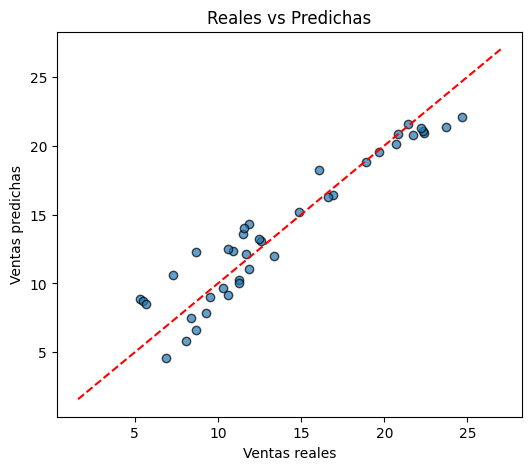

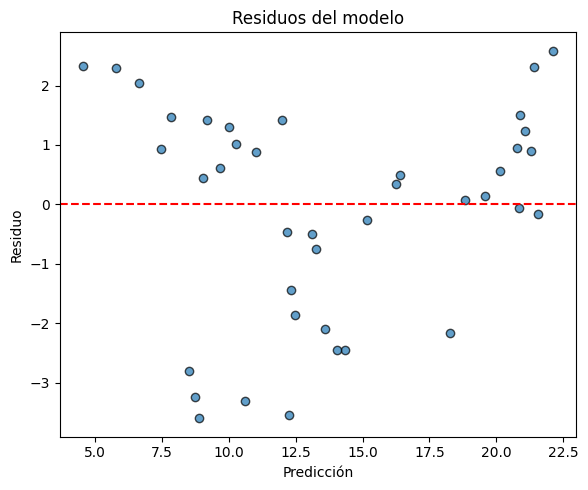

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ============================================
# Carga y revisión rápida del dataset
# ============================================
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

print("Vista rápida del dataset:")
print(data.head(), "\n")

# ============================================
# Preparación de datos
# ============================================
X = data[["TV", "radio", "newspaper"]]
y = data["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================
# Escalado y modelo
# ============================================
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

model = LinearRegression().fit(X_train, y_train)

# ============================================
# Predicción y evaluación
# ============================================
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}\n")

# ============================================
# Coeficientes
# ============================================
coef = pd.DataFrame({
    "Variable": ["TV", "Radio", "Newspaper"],
    "Peso": model.coef_
})
print("Coeficientes del modelo:\n", coef)
print(f"Intercepto: {model.intercept_:.2f}\n")

# ============================================
# Gráficos
# ============================================
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Reales vs Predichas")

plt.figure(figsize=(6,5))
res = y_test - y_pred
plt.scatter(y_pred, res, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo")
plt.xlabel("Predicción")
plt.ylabel("Residuo")

plt.tight_layout()
plt.show()
